<!-- Main heading with larger font size -->
<h1 style="font-size: 18px;">1. Problem Statement:</h1>

<!-- Subheading with smaller font size -->
<h2 style="font-size: 14px;">The goal of this project is to understand the influence of the parents' background, test preparation, and various other variables on the students' performance.</h2>
   

<!-- Main heading with larger font size -->
<h1 style="font-size: 18px;">2. Data Collection:</h1>

<!-- Subheading with smaller font size -->
<h2 style="font-size: 14px;">Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download</h2>
   



<h2 style="font-size: 14px;">2.1 Import Necessary Libraries</h2>


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h2 style="font-size: 14px;">2.2 Read the dataset as a dataframe</h2>

In [18]:
df = pd.read_csv('D:/MLProject/notebook/data/stud.csv')

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.shape

(1000, 8)

<h1 style="font-size: 18px;">3. Perform Data Checks:</h1>

<!-- Subheading with smaller font size -->
<h2 style="font-size: 14px;">3.1 Checking Missing Values</h2>

In [21]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<h2 style="font-size: 14px;">3.2 Checking Duplicate Values</h2>

In [22]:
df.duplicated().sum()

0

<h2 style="font-size: 14px;">3.3 Checking the datatypes of columns</h2>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h2 style="font-size: 14px;">3.4 Checking the number of unique values in each column</h2>

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<h2 style="font-size: 14px;">3.5 Checking statistics of the dataset.</h2>

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h2 style="font-size: 14px;">3.6 Checking various categories in each column.</h2>

In [26]:
print("Categories in 'gender' variables: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variables: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variables: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variables: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variables:  ['female' 'male']
Categories in 'race/ethnicity' variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:  ['standard' 'free/reduced']
Categories in 'test preparation course' variables:  ['none' 'completed']


In [27]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [28]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


<h1 style="font-size: 18px;">4. Exploring and Visualization Data:</h1>

<!-- Subheading with smaller font size -->
<h2 style="font-size: 12px;">To make data exploration and visualization more informative, we can perform feature engineering by adding two more columns to gain more insights, namely, 'Total score' and 'Average score'.</h2>

In [29]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [31]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


<h2 style="font-size: 18px;">4.1 Visualizing Data</h2>

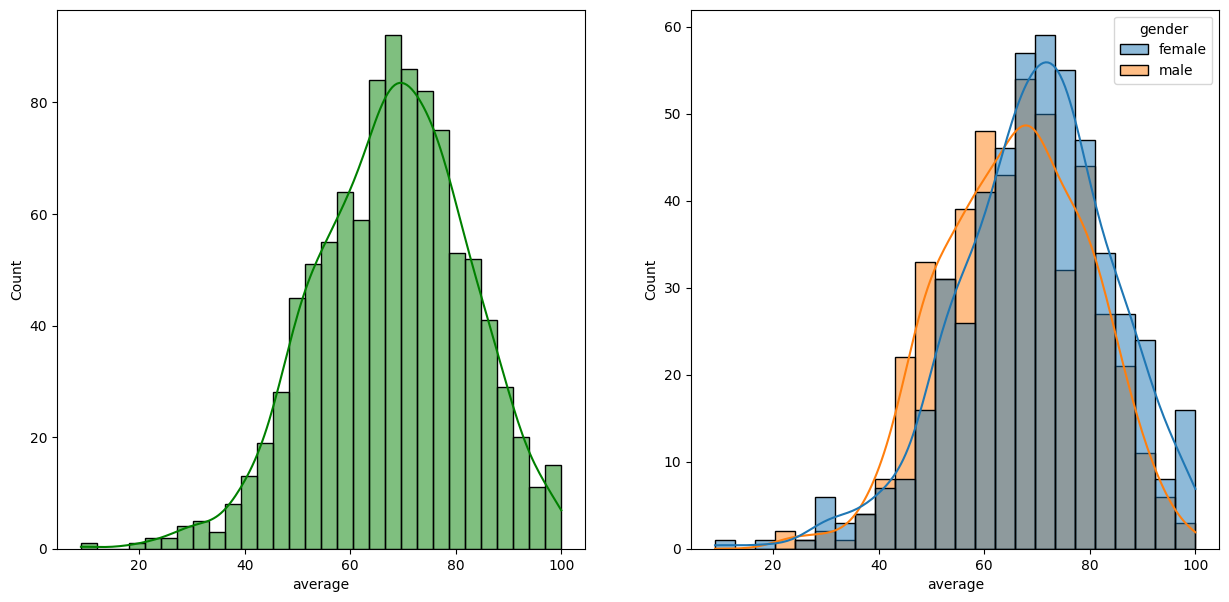

In [32]:
fig,axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

<h2 style="font-size: 14px;">First, the majority of students have an average score that is between ~ 60 and 80.</h2>
<h2 style="font-size: 14px;">Second, we can see in the second graph that more females have gotten higher average scores than boys.</h2>

<h2 style="font-size: 16px;">Visualize total score distribution</h2>

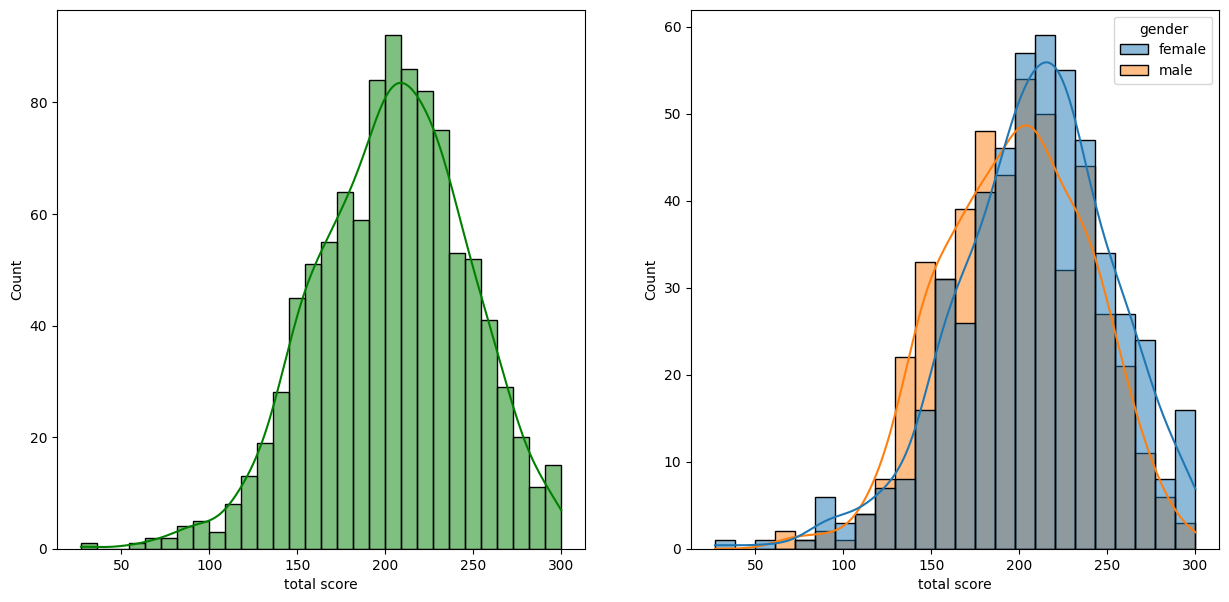

In [33]:
fig,axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

<h2 style="font-size: 14px;">The majority of students have a total score that is between ~ 180 and 240.</h2>
<h2 style="font-size: 14px;">We can see in the second graph that more females have gotten higher total scores than boys.</h2>
<h2 style="font-size: 14px;">Female students tend to perform better overall compared to male students in this case.</h2>

<h2 style="font-size: 16px;">average score distribution based on the variable lunch.</h2>

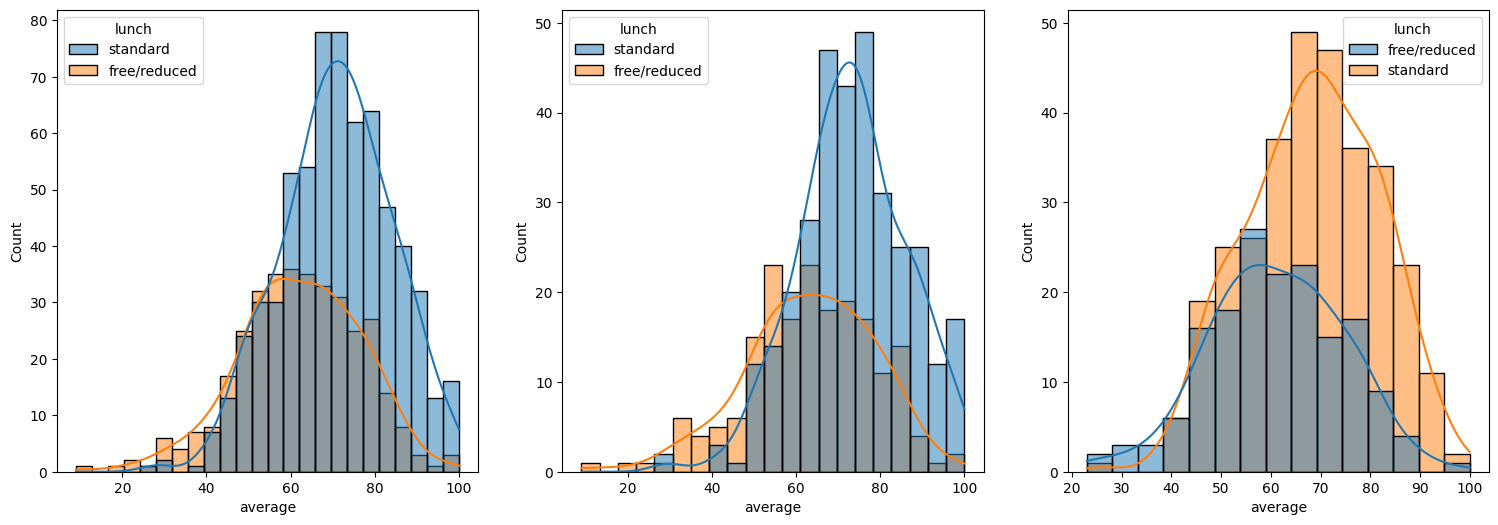

In [34]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

<h2 style="font-size: 16px;">Insights:</h2>
<h2 style="font-size: 14px;">Standard lunch helps perform well in exams.
</h2>
<h2 style="font-size: 14px;">Standard lunch helps perform well in exams be it a male or a female.</h2>

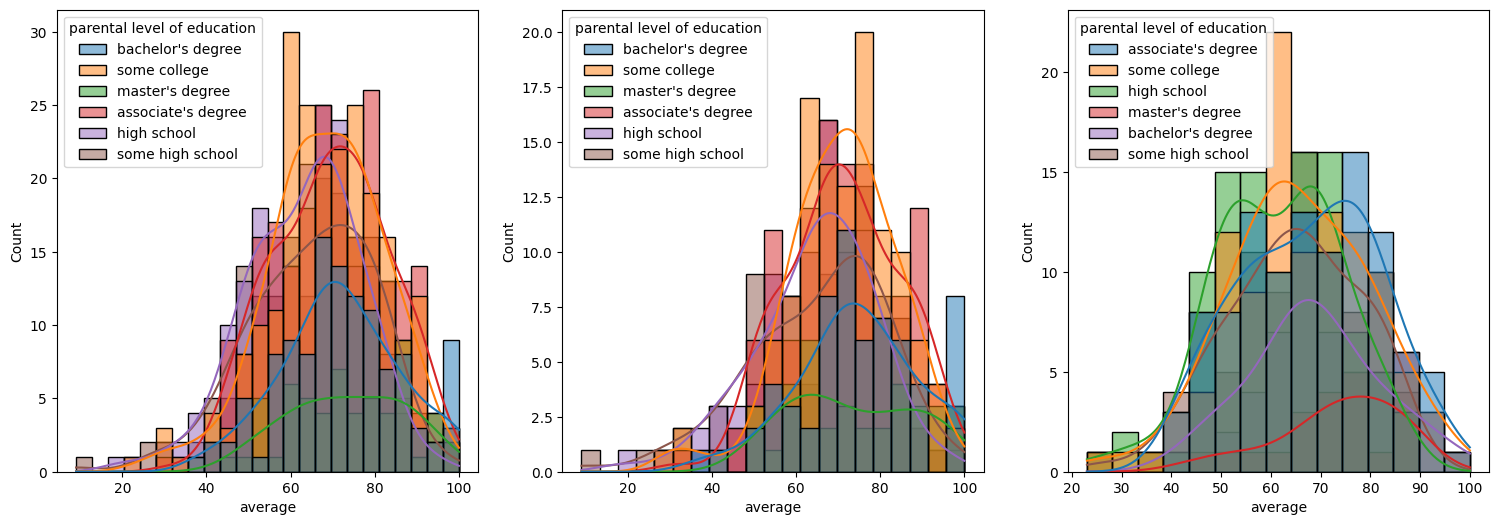

In [35]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

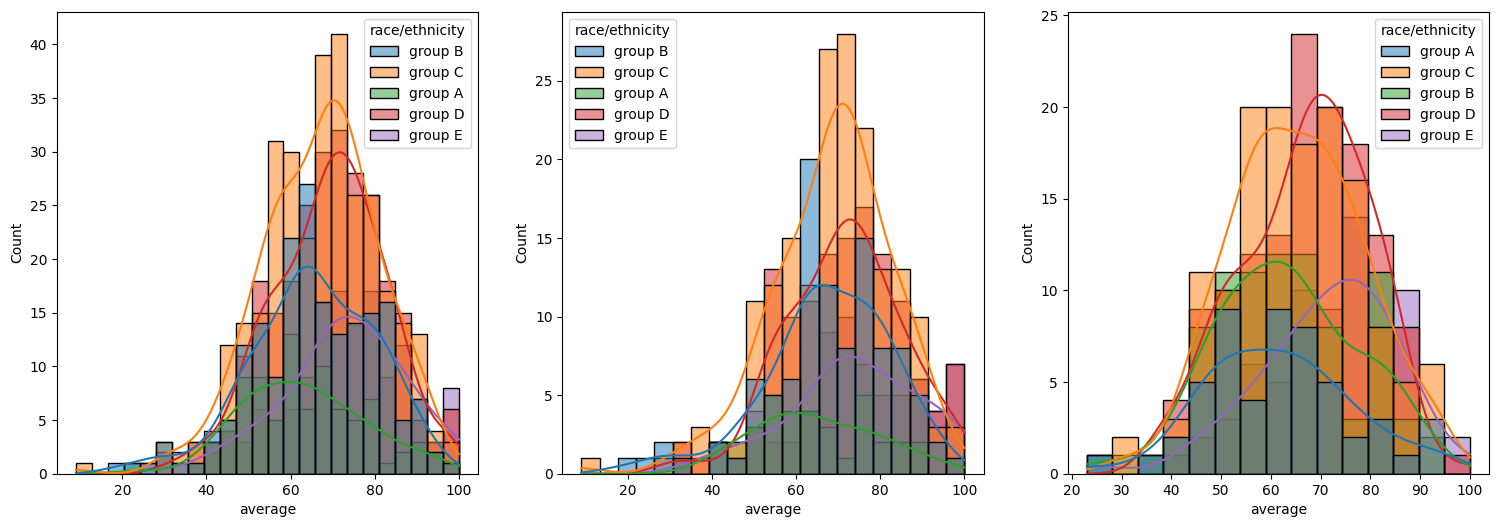

In [36]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

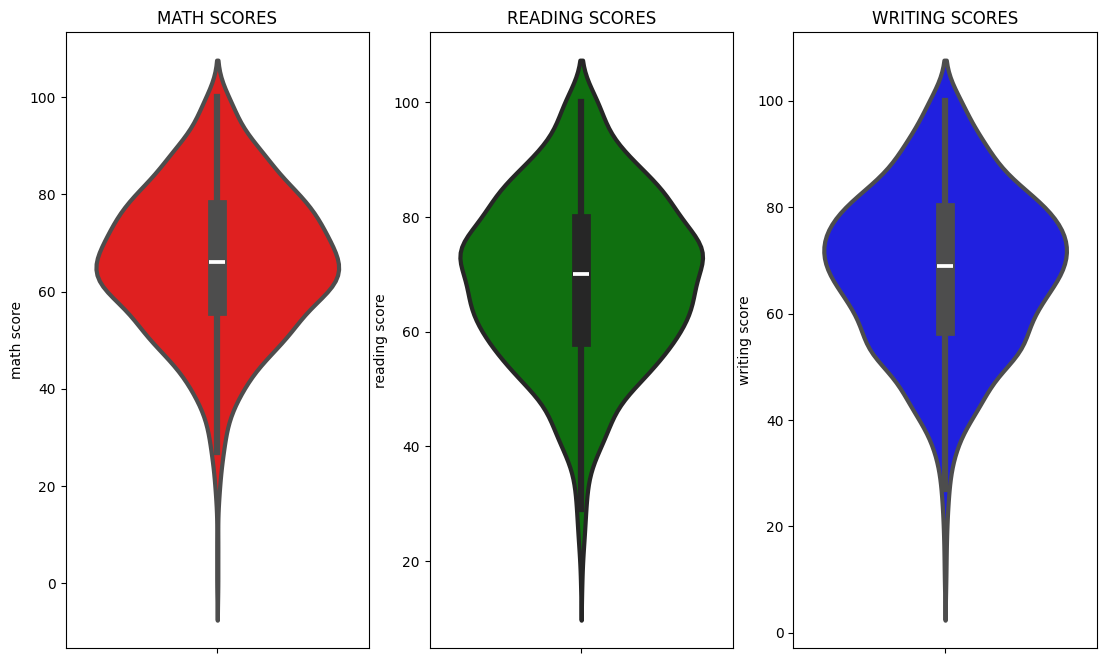

In [37]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORES")
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

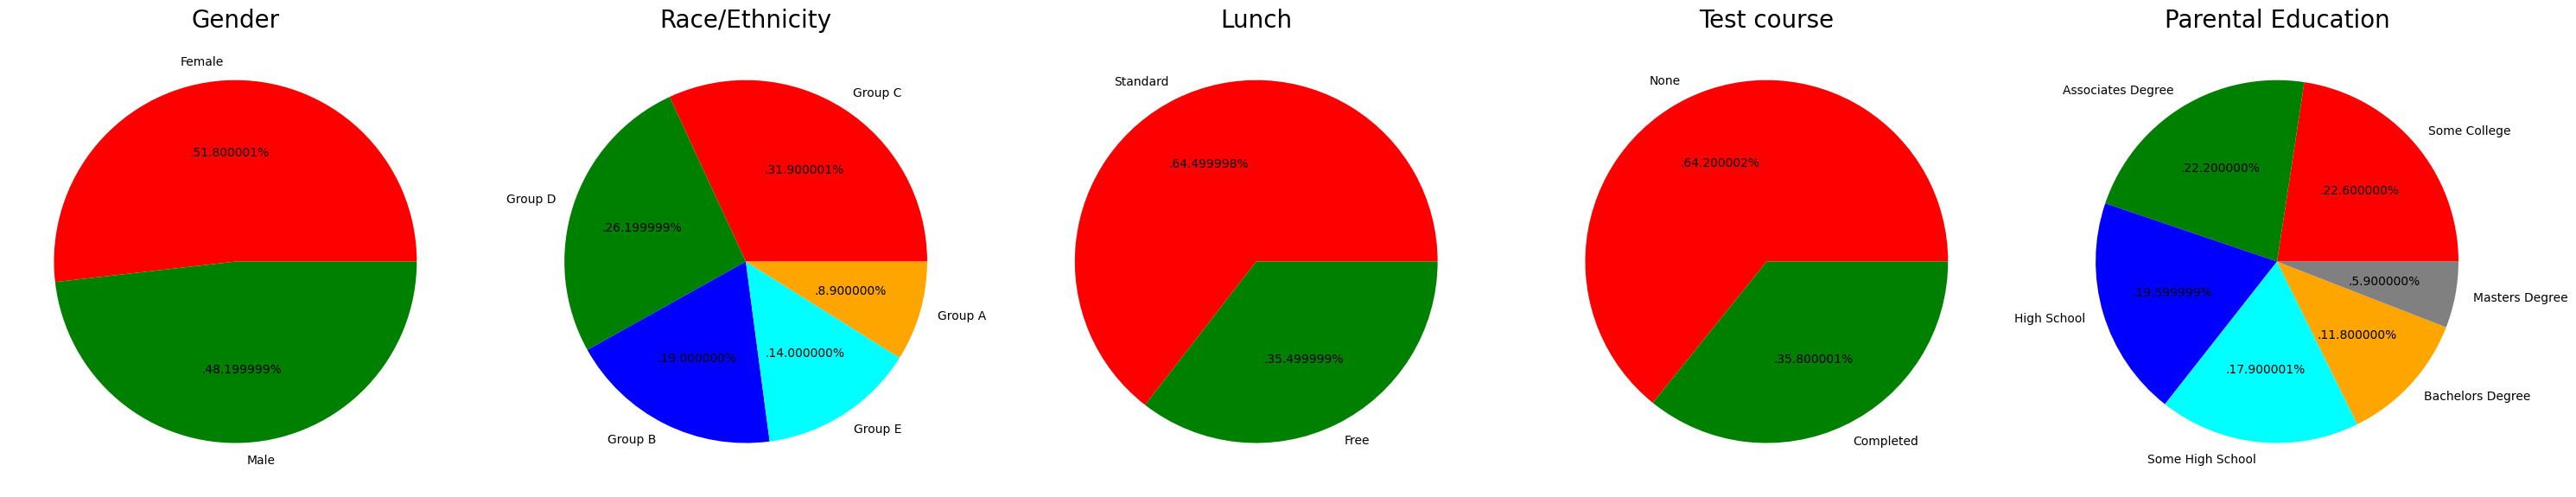

In [38]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color =  ['red','green']

plt.pie(size,colors=color,labels = labels,autopct = '.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color =  ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color =  ['red','green']

plt.pie(size,colors=color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color =  ['red','green']

plt.pie(size,colors=color,labels = labels,autopct = '.%2f%%')
plt.title('Test course',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College','Associates Degree','High School','Some High School','Bachelors Degree','Masters Degree'
color =  ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education',fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

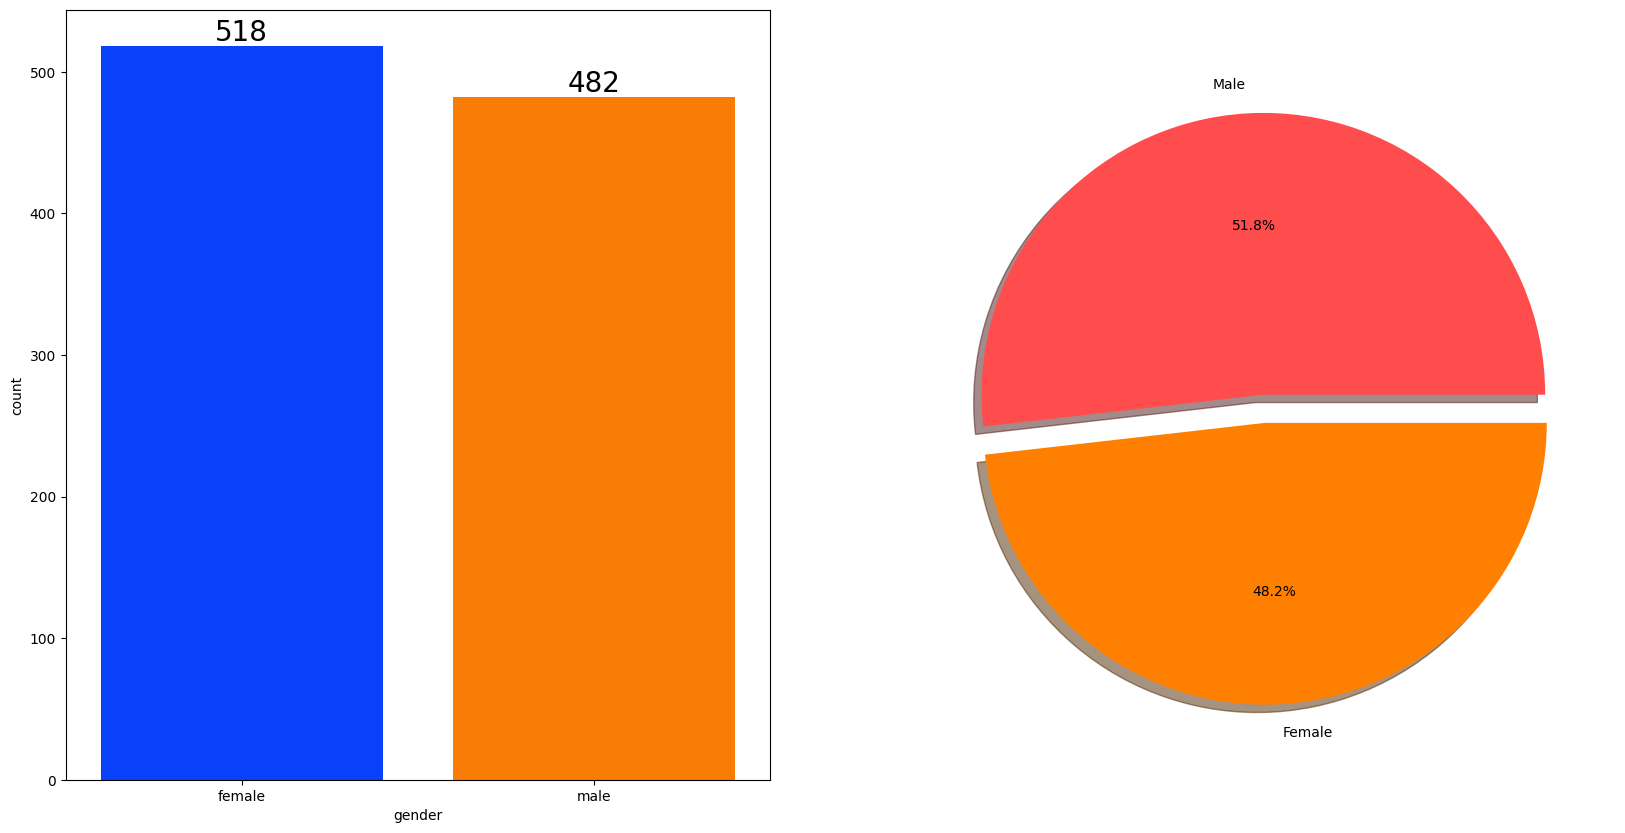

In [42]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright',
              ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[
        0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

In [47]:
numeric_cols = df.select_dtypes(include='number')

# Perform the groupby operation on the numeric columns
gender_group = numeric_cols.groupby(df['gender']).mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


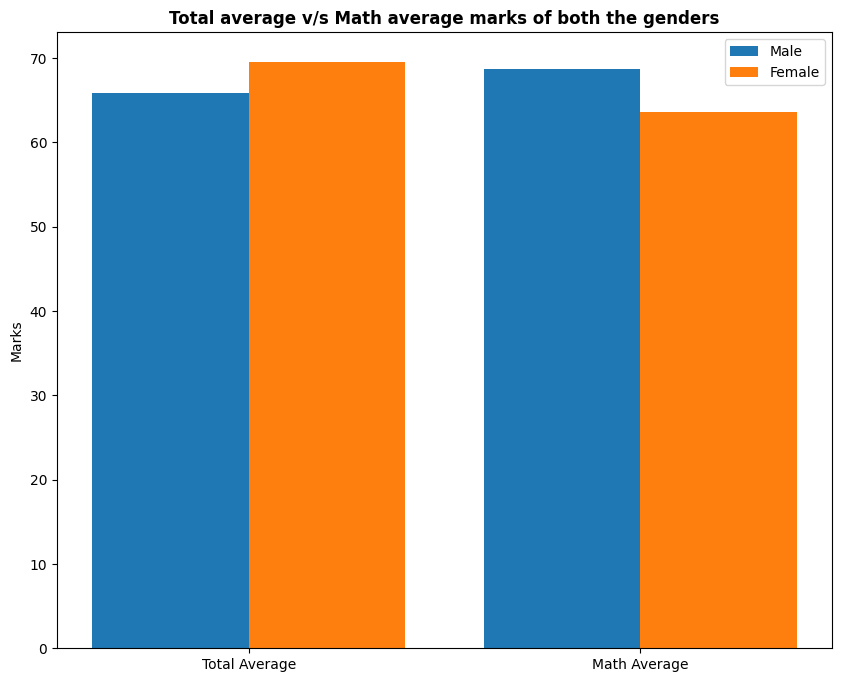

In [49]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders",
          fontweight='bold')
plt.legend()
plt.show()

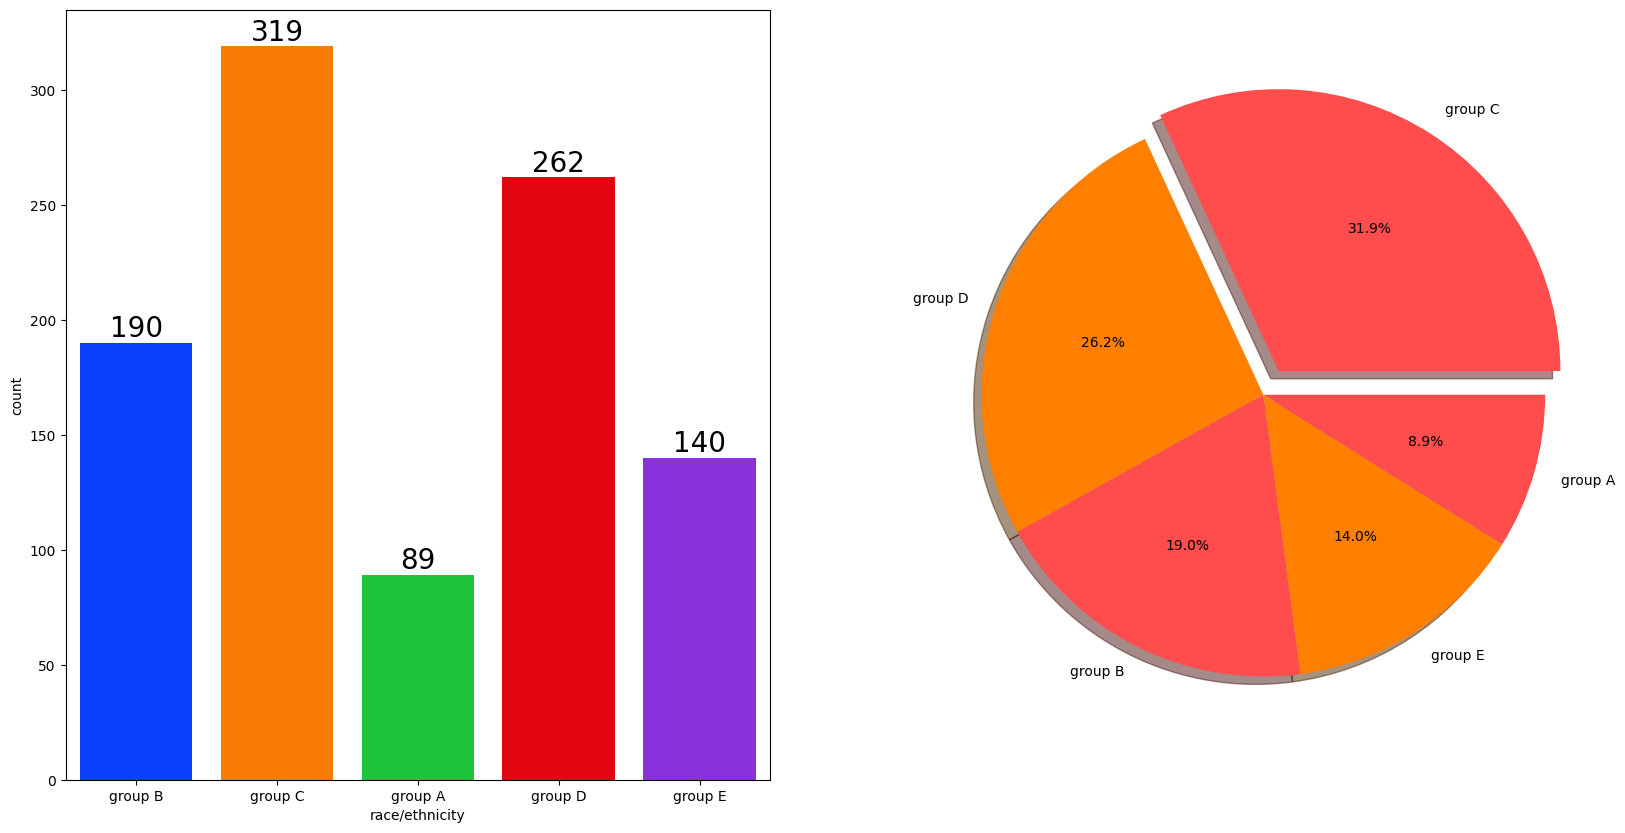

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

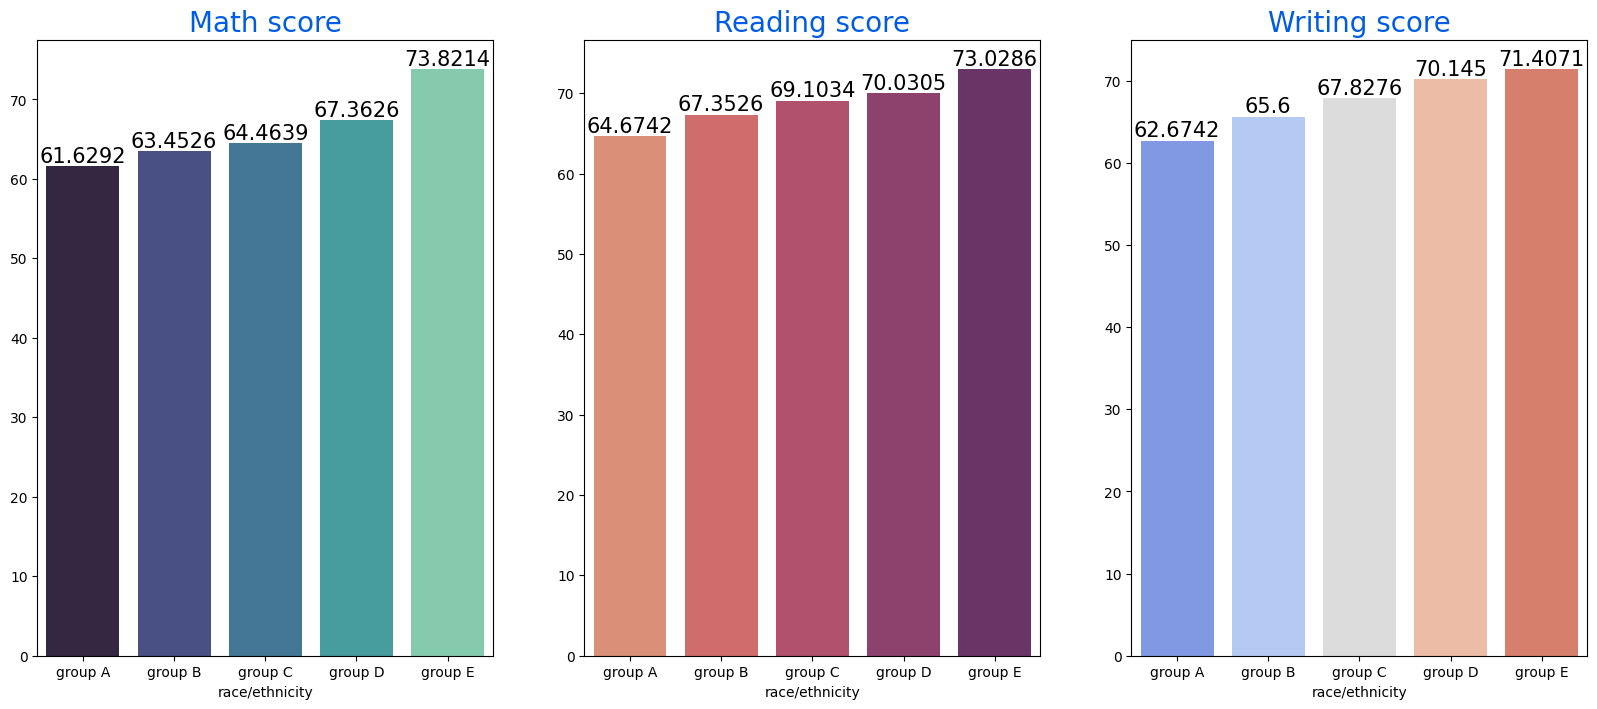

In [50]:
group_data2 = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading score'].mean().index,y=group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing score'].mean().index,y=group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

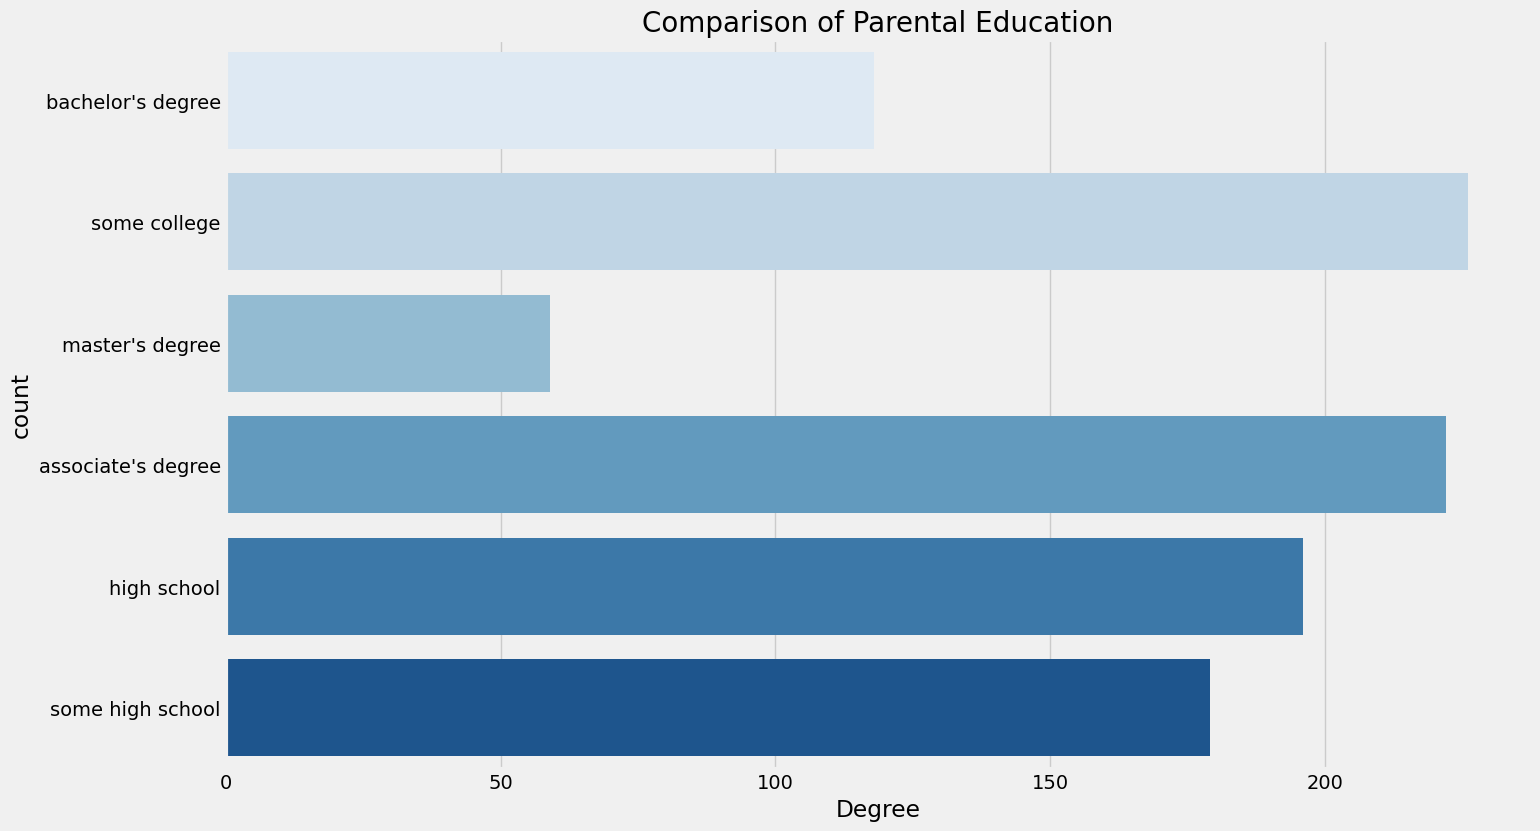

In [53]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()  

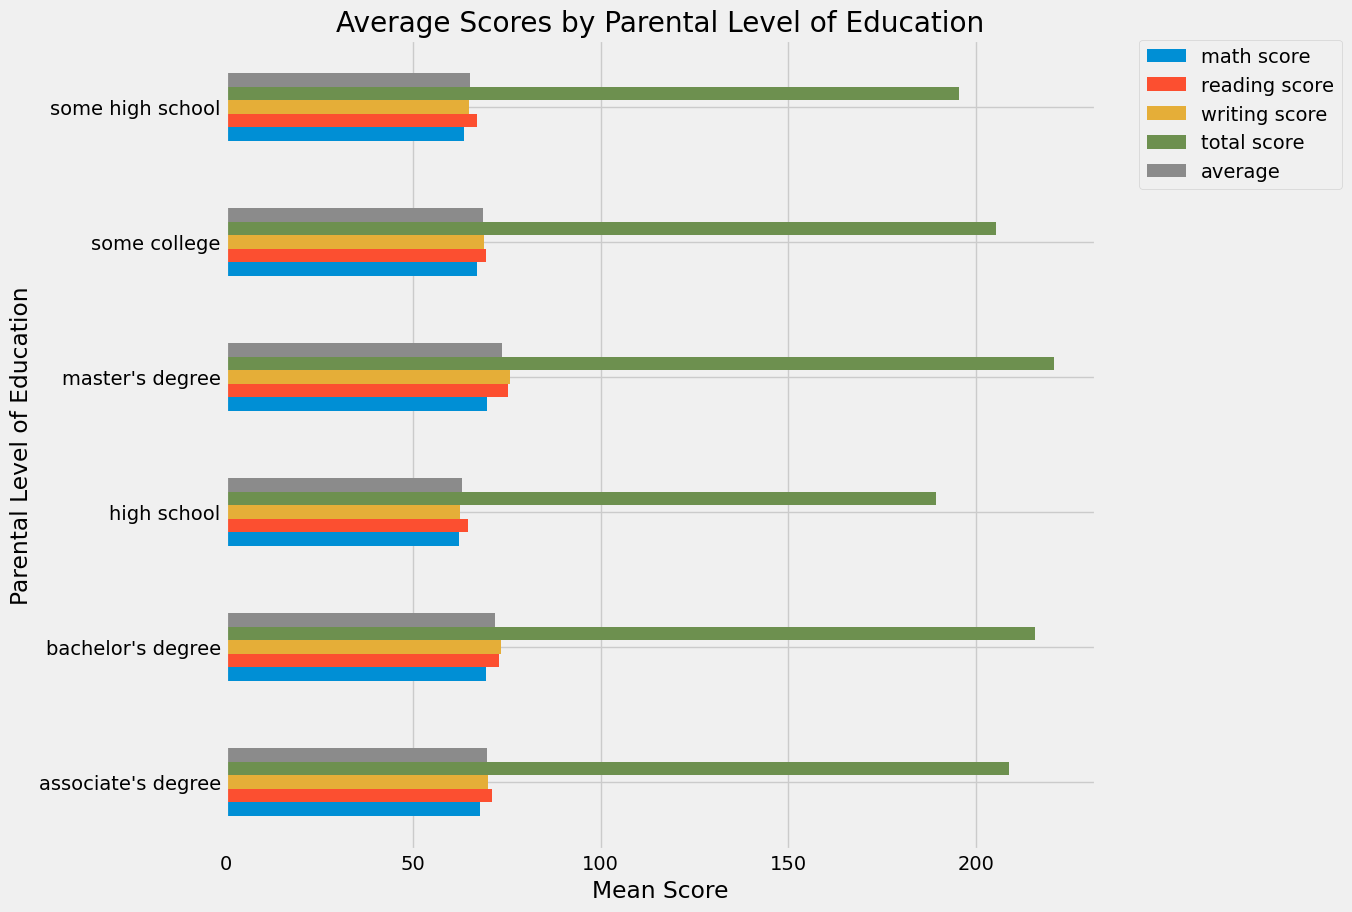

In [55]:
numeric_cols = df.select_dtypes(include='number')

# Group by 'parental level of education' and calculate the mean of numeric columns
grouped_df = numeric_cols.groupby(df['parental level of education']).mean()

# Plot the result as a bar plot
grouped_df.plot(kind='barh', figsize=(10, 10))

# Customize the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Mean Score')
plt.ylabel('Parental Level of Education')

# Show the plot
plt.show()

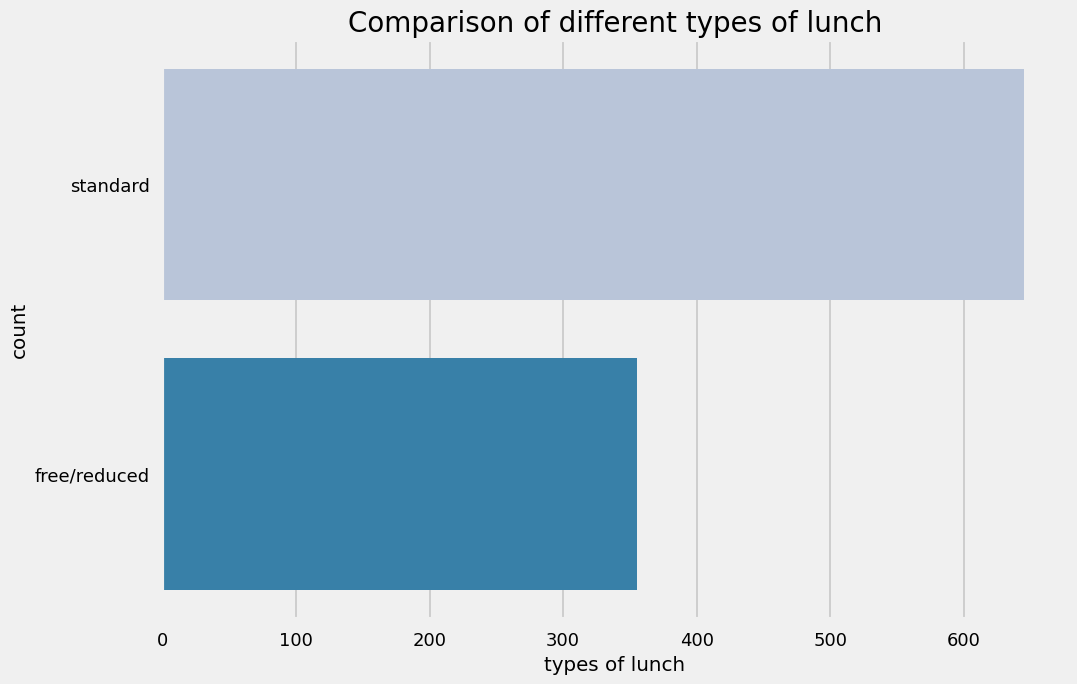

In [59]:
plt.rcParams['figure.figsize'] = (4, 3)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

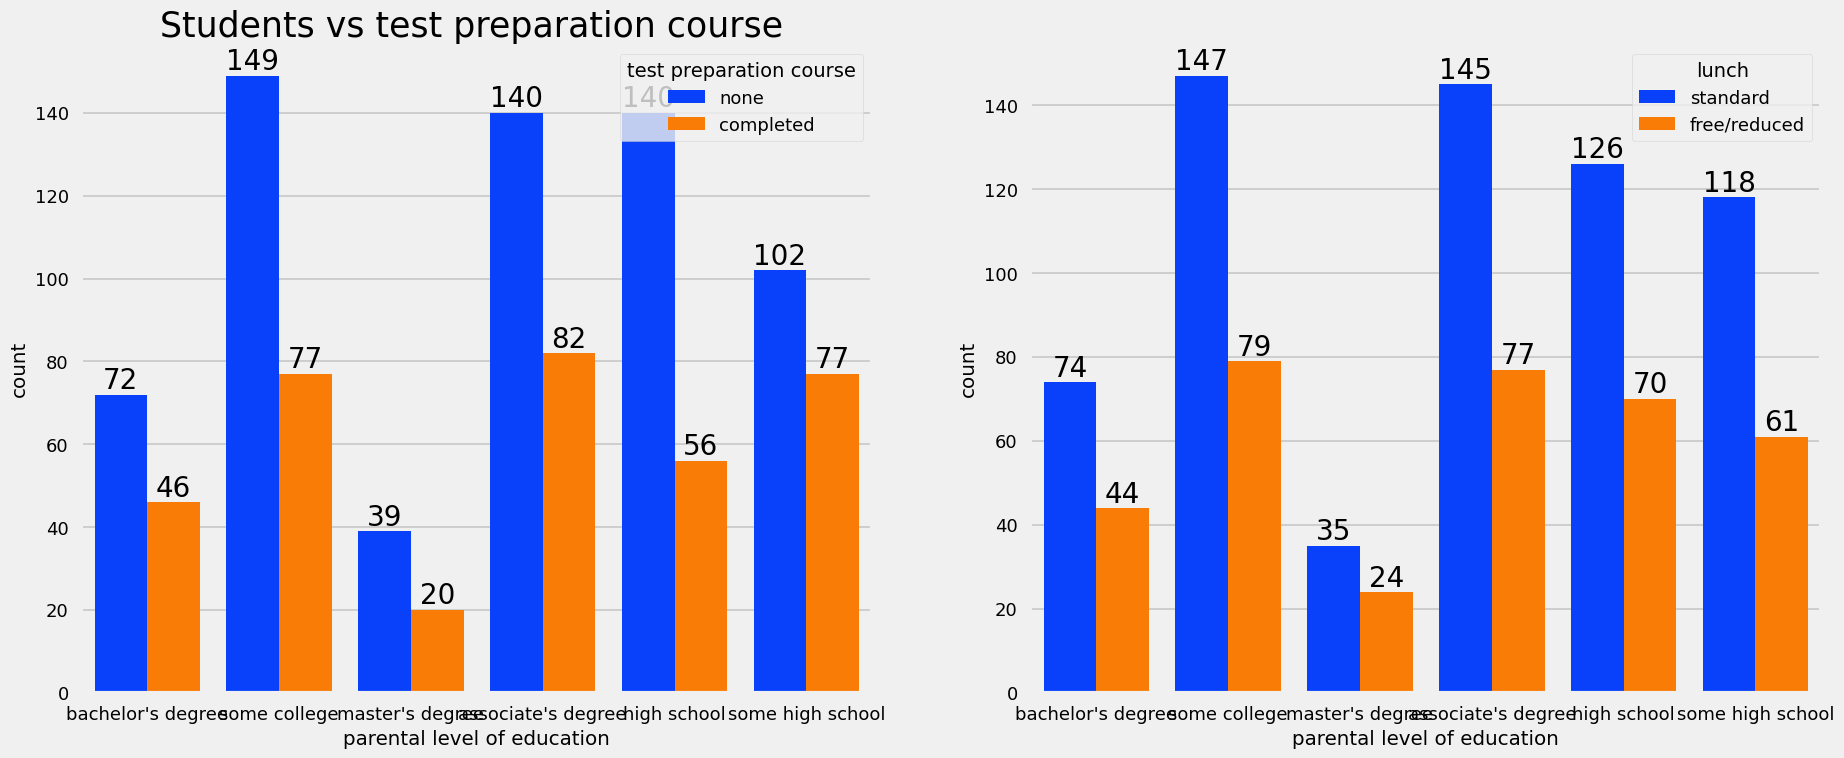

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

<Axes: xlabel='lunch', ylabel='writing score'>

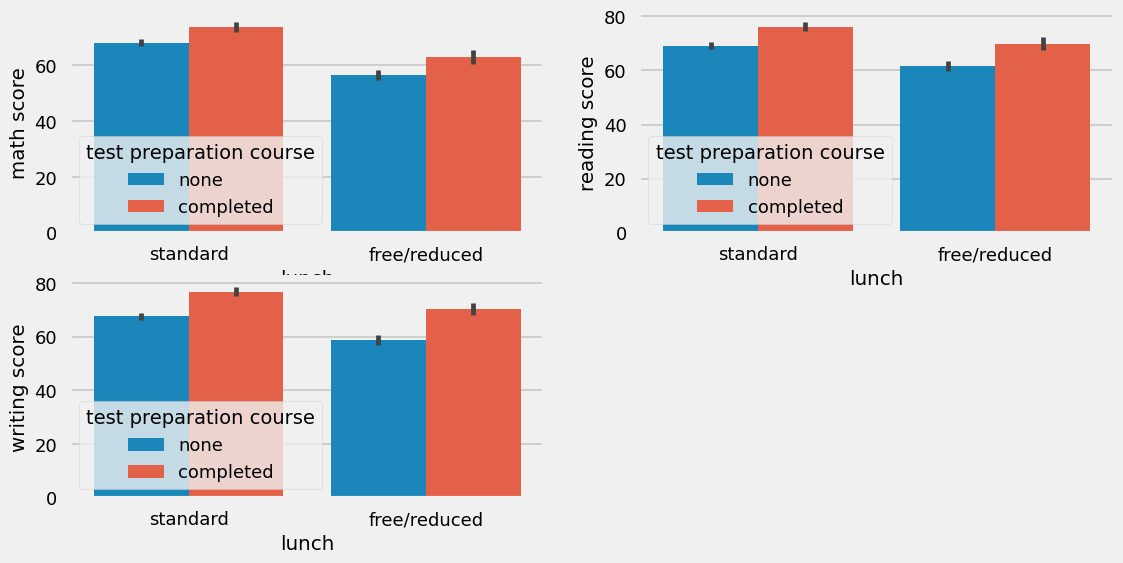

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'],
            hue=df['test preparation course'])
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'],
            hue=df['test preparation course'])
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'],
            hue=df['test preparation course'])

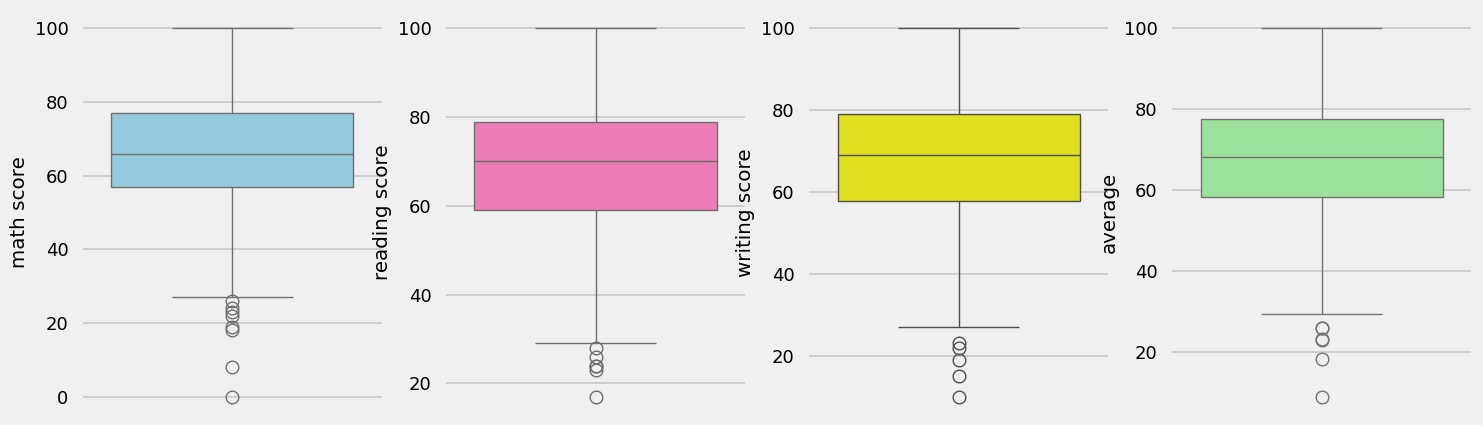

In [63]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()

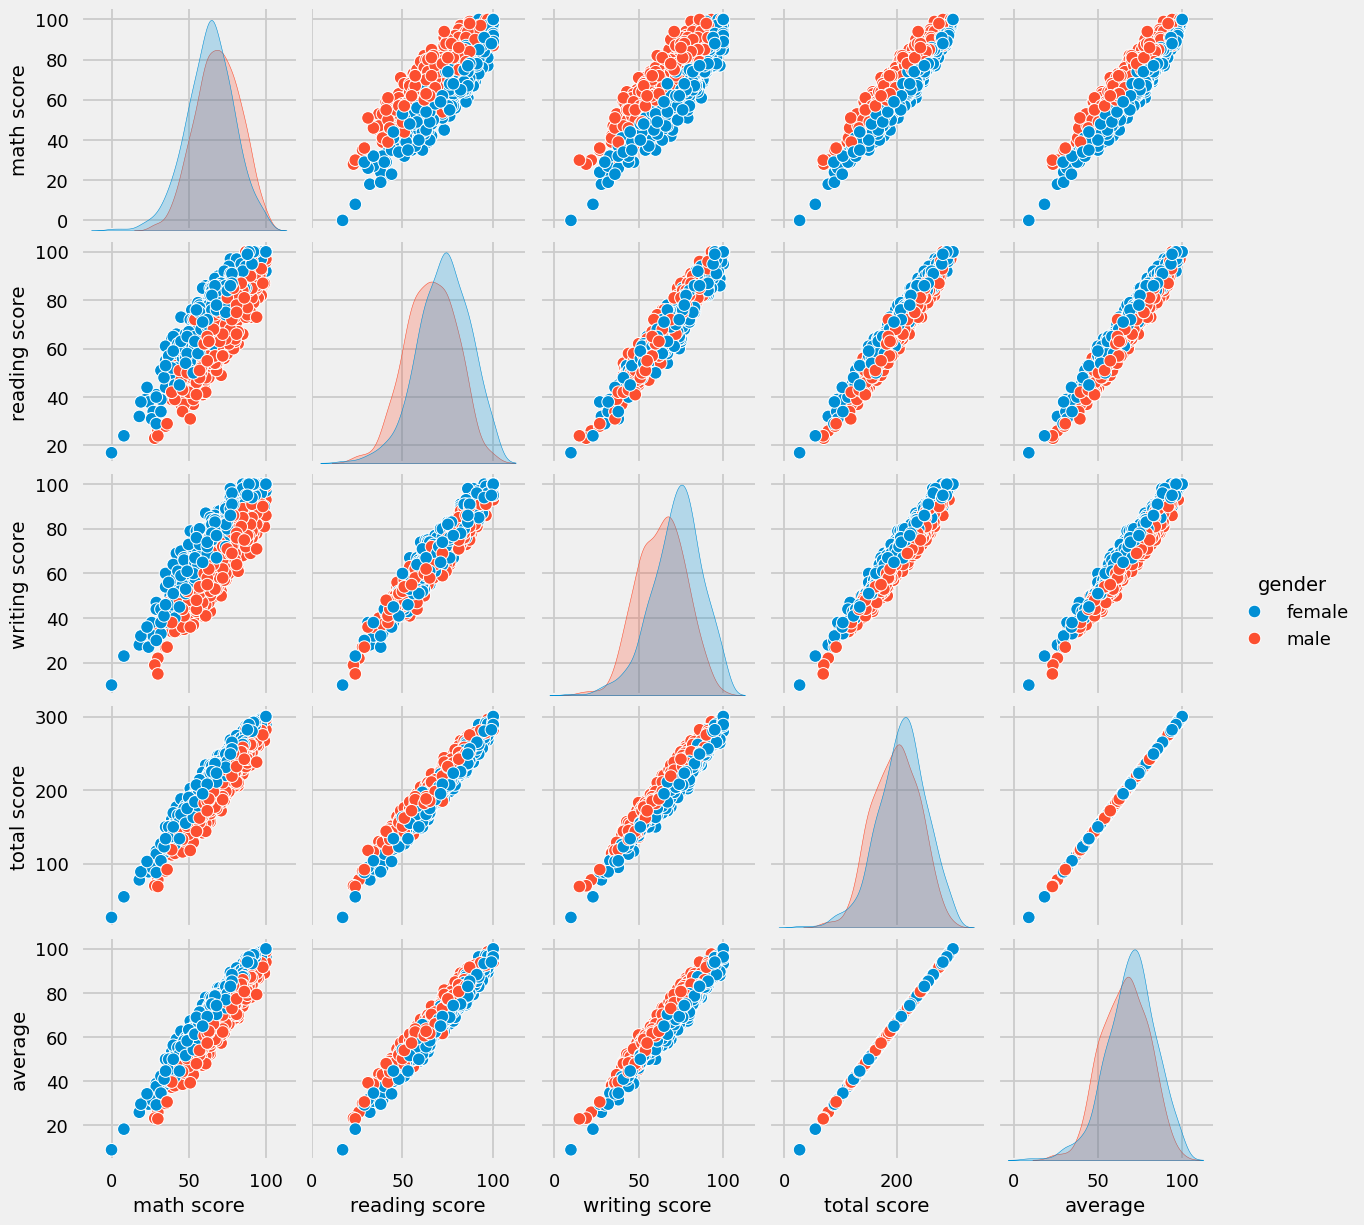

In [64]:
sns.pairplot(df, hue='gender')
plt.show()